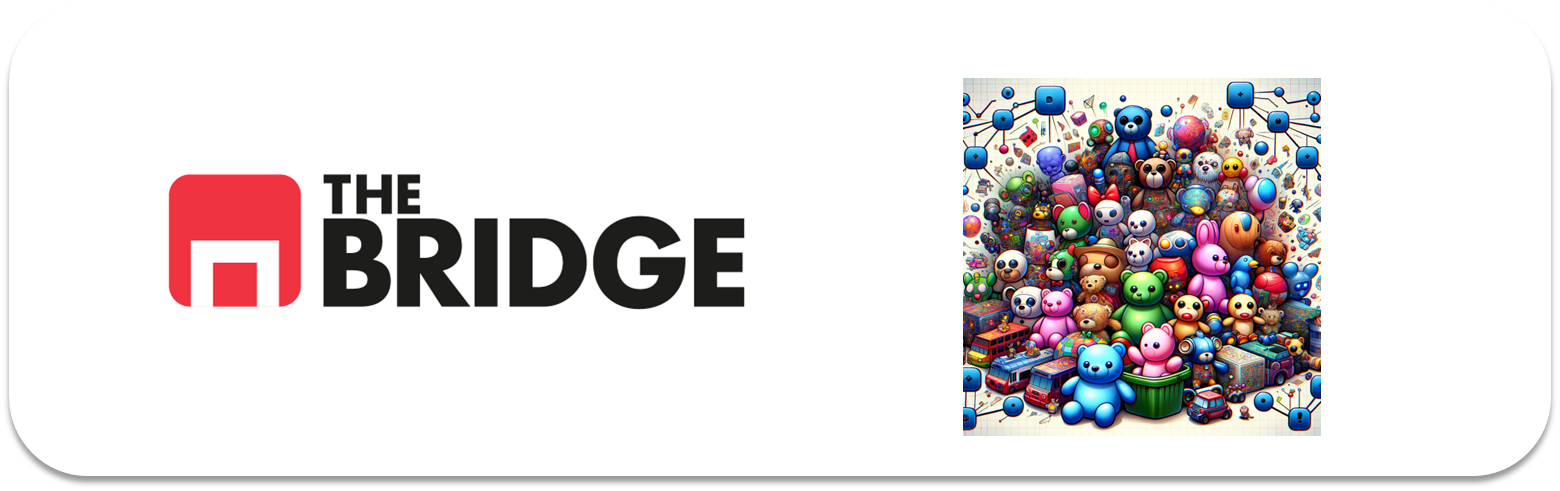

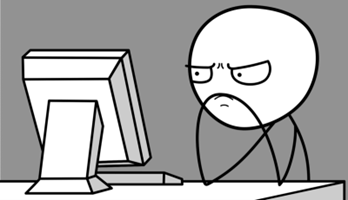

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import funciones_ML as bt
from sklearn.cluster import DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as shc





### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


Vamos a intenetar establecer conjuntos de mezclas de beebidas que mas semejanzas tenga, creando varios clusteres, usando primero como mediad la denisadad de la muestras y elñ otro sera un jerarquico agolmerativo

In [2]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRINT_15_NO_SUPERVISADOS_CLUSTERING\UNIT_2\TRABAJO_OBL\data\empowering_drinks.csv", sep="|")

In [3]:
df

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276
...,...,...,...,...,...
148,0.493343,0.414820,-1.284344,0.009893,0.969783
149,0.332758,-0.389355,-1.344582,0.280575,2.224236
150,0.209232,0.012732,-1.354622,0.296498,1.834923
151,1.395086,1.365208,-1.274305,-0.595160,1.791666


In [4]:
bt.obtener_estadisticas(df)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
Azúcares,72.55,float64,0.02,No,1.03,1.05,-0.82,0.06,0.88,numerica continua,0.0
Vitamínas del grupo B,49.02,float64,0.04,No,1.0,0.99,-0.5,-0.02,0.71,numerica continua,0.0
Cafeína,79.08,float64,0.04,No,1.04,1.08,-1.04,0.21,0.89,numerica continua,0.0
Ácido Cítrico,73.2,float64,0.08,No,1.01,1.02,-0.74,-0.17,0.92,numerica continua,0.0
Taurina,77.78,float64,-0.04,No,0.93,0.87,-0.8,-0.15,0.49,numerica continua,0.0


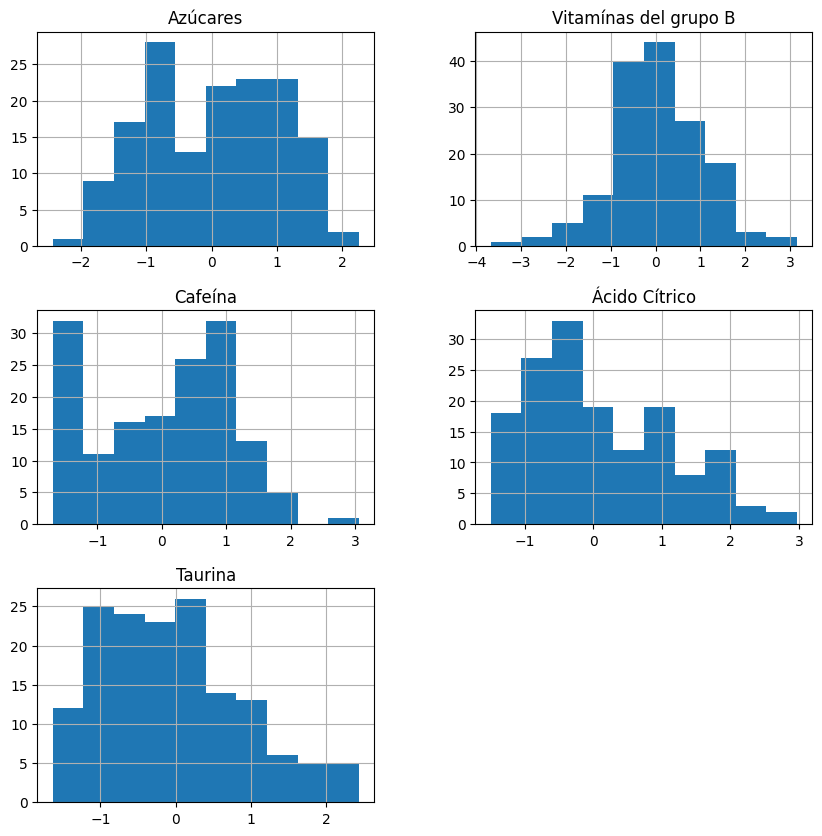

In [5]:
df.hist(figsize=(10,10), bins=10);


In [6]:
df.columns

Index(['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico',
       'Taurina'],
      dtype='object')

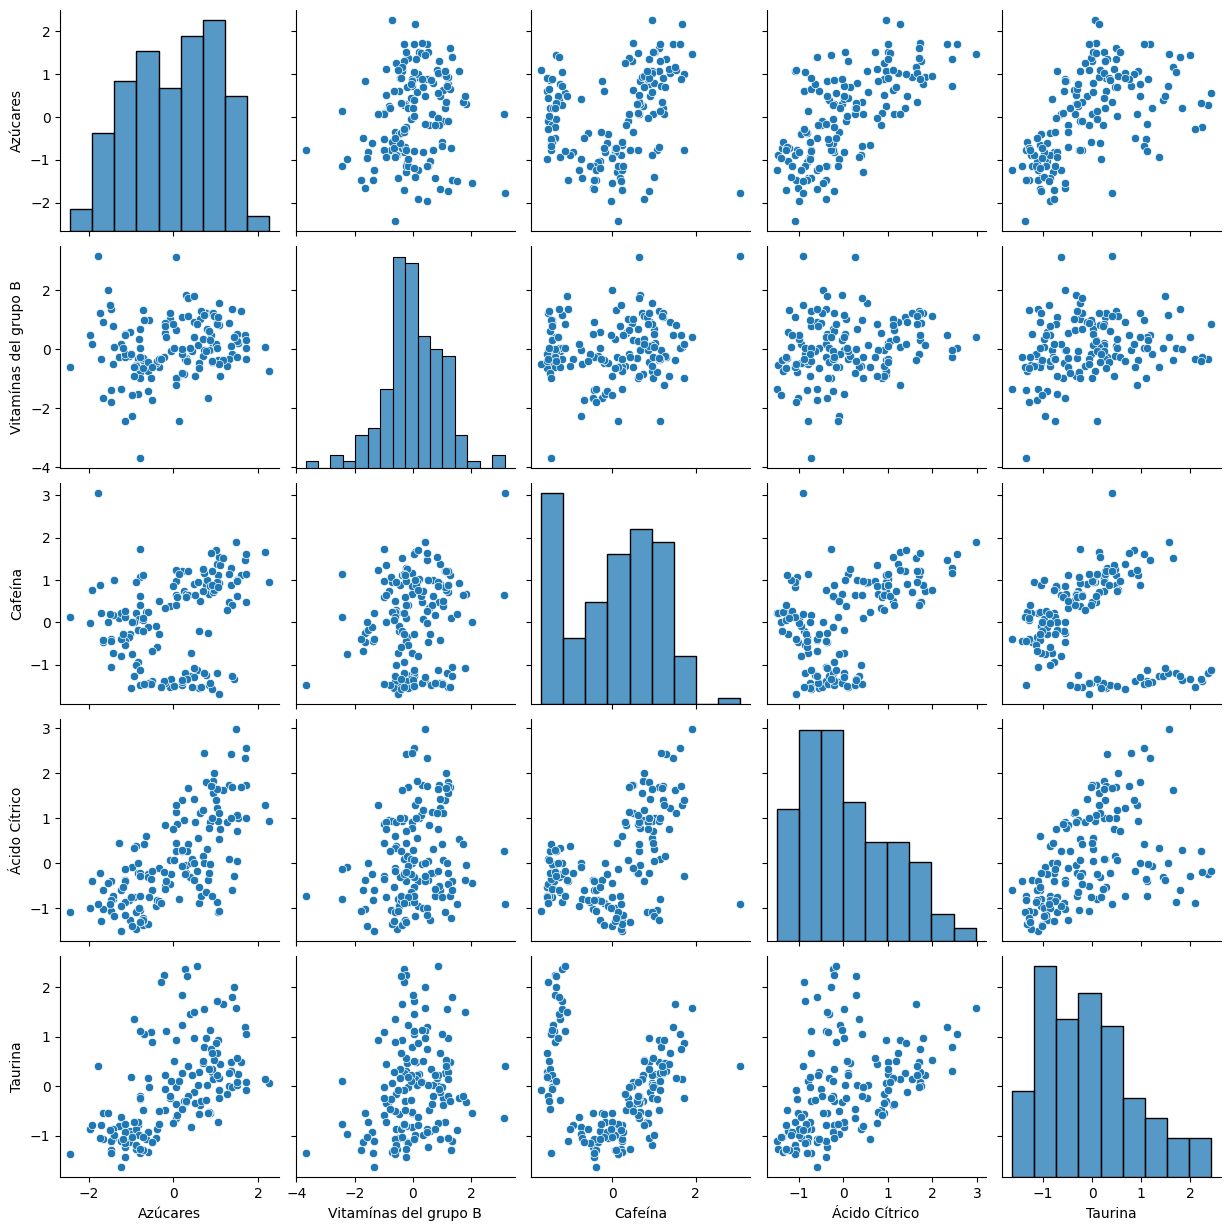

In [7]:
sns.pairplot(df);

In [8]:
df.columns

Index(['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico',
       'Taurina'],
      dtype='object')

<Axes: xlabel='Cafeína', ylabel='Taurina'>

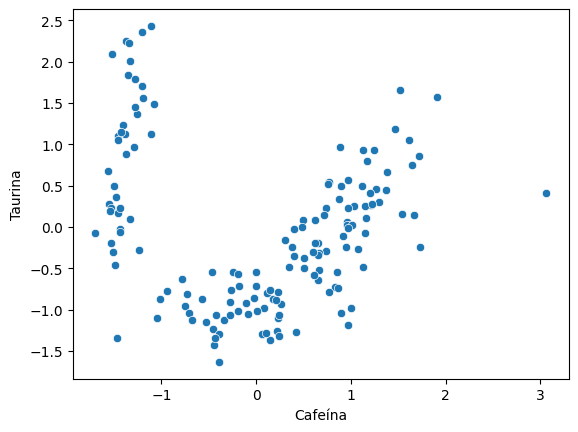

In [9]:
# analisis bivariante 3
sns.scatterplot(x=df["Cafeína"],
                y=df['Taurina'])
# SE VEN TRES ZONAS DIFERENCIADAS ME LA QUEDO

<Axes: xlabel='Cafeína', ylabel='Ácido Cítrico'>

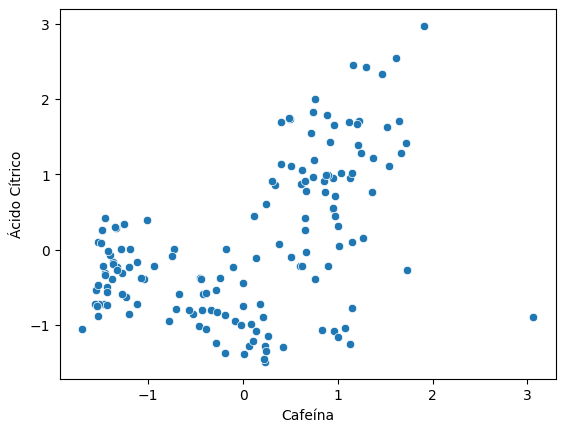

In [10]:
# analisis bivariante 3
sns.scatterplot(x=df["Cafeína"],
                y=df['Ácido Cítrico'])

<Axes: xlabel='Vitamínas del grupo B', ylabel='Taurina'>

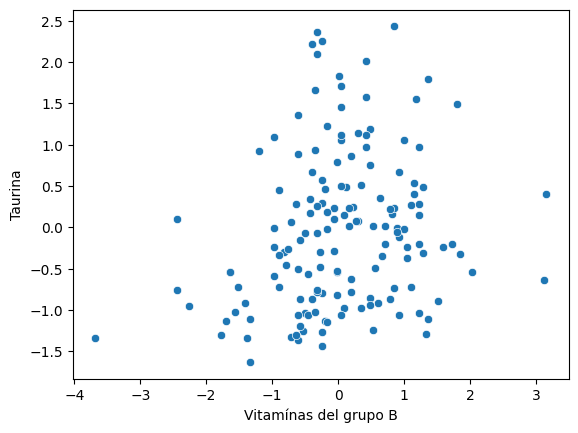

In [11]:
# analisis bivariante 2
sns.scatterplot(x=df["Vitamínas del grupo B"],
                y=df['Taurina'])

<Axes: xlabel='Vitamínas del grupo B', ylabel='Ácido Cítrico'>

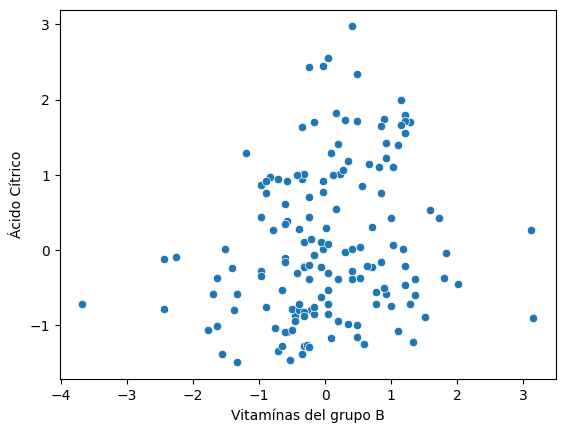

In [12]:
# analisis bivariante 2
sns.scatterplot(x=df["Vitamínas del grupo B"],
                y=df['Ácido Cítrico'])

<Axes: xlabel='Vitamínas del grupo B', ylabel='Cafeína'>

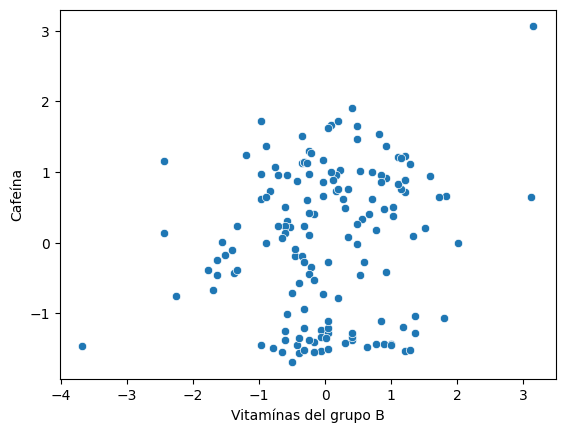

In [13]:
# analisis bivariante 2
sns.scatterplot(x=df["Vitamínas del grupo B"],# ME LA QUEDO
                y=df['Cafeína'])

<Axes: xlabel='Azúcares', ylabel='Taurina'>

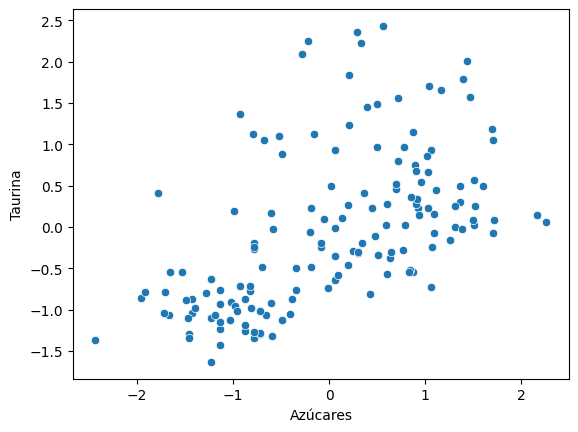

In [14]:
# analisis bivariante
sns.scatterplot(x=df["Azúcares"],
                y=df['Taurina'])

<Axes: xlabel='Azúcares', ylabel='Ácido Cítrico'>

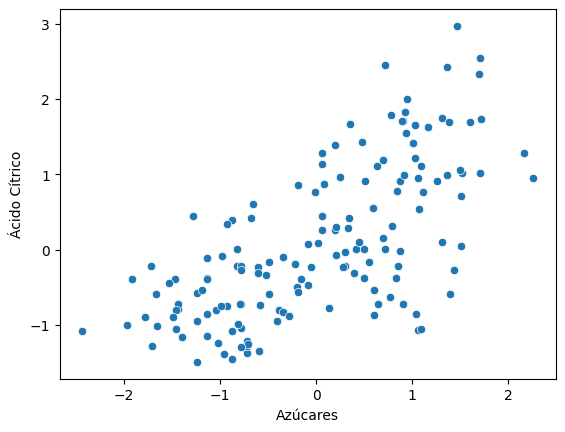

In [15]:
# analisis bivariante
sns.scatterplot(x=df["Azúcares"],
                y=df['Ácido Cítrico'])

<Axes: xlabel='Azúcares', ylabel='Cafeína'>

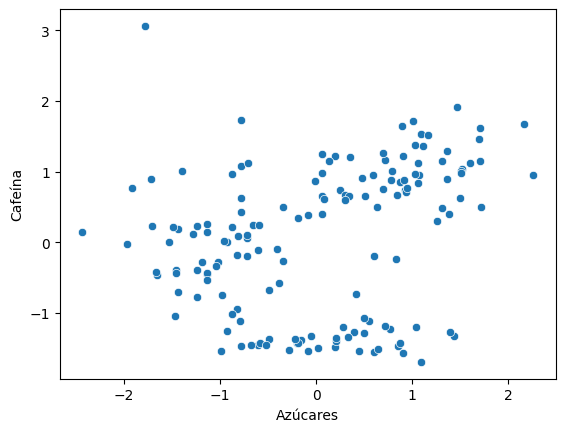

In [16]:
# analisis bivariante
sns.scatterplot(x=df["Azúcares"],
                y=df['Cafeína'])
# no se observa agrupacion densa, podria haber 2 clusteres pero muy poco densos, (POSIBLE DESCARTABLE)

<Axes: xlabel='Azúcares', ylabel='Vitamínas del grupo B'>

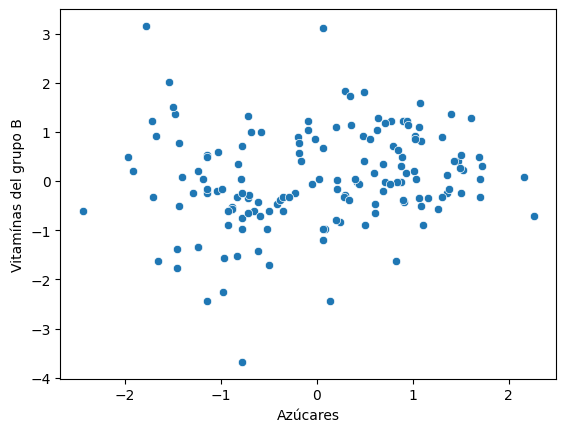

In [17]:
# analisis bivariante
sns.scatterplot(x=df["Azúcares"],
                y=df['Vitamínas del grupo B'])
# no se observa agrupacion densa, podria haber 2 clusteres pero muy poco densos, (POSIBLE DESCARTABLE)

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, style, size. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Cafeína', ylabel='Vitamínas del grupo B'>

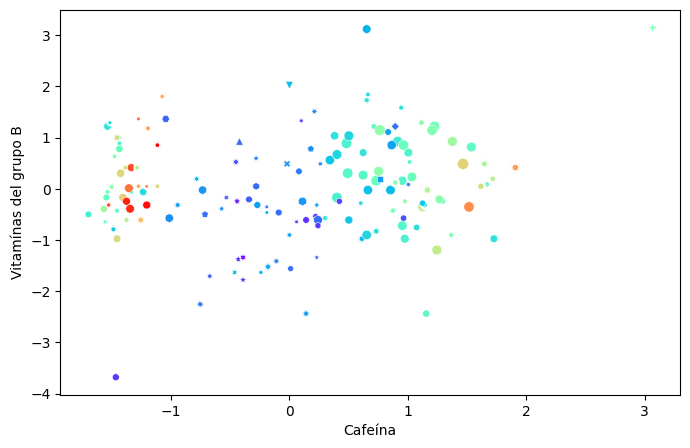

In [18]:
# scatter completo
fig = plt.figure(figsize=(8,5))
sns.scatterplot(df["Cafeína"], 
                df['Vitamínas del grupo B'], 
                df['Taurina'],
                df['Azúcares'],
                df['Ácido Cítrico'],
                legend=False,
                data=df, 
                palette = "rainbow")

In [56]:
# probamos quitando 2 y y con df entero, quedandome con la mejor opcion
train_set=['Cafeína','Taurina']

# son las que se observa concentraciones de puntos, aqunque la que mas me ha gustado es taurina con cafeina

In [20]:
# numero de colusteres por el metodo del codo, se puede ver como el metodo silueta esta cerca del 3 cpincidiendo con el codo de 3

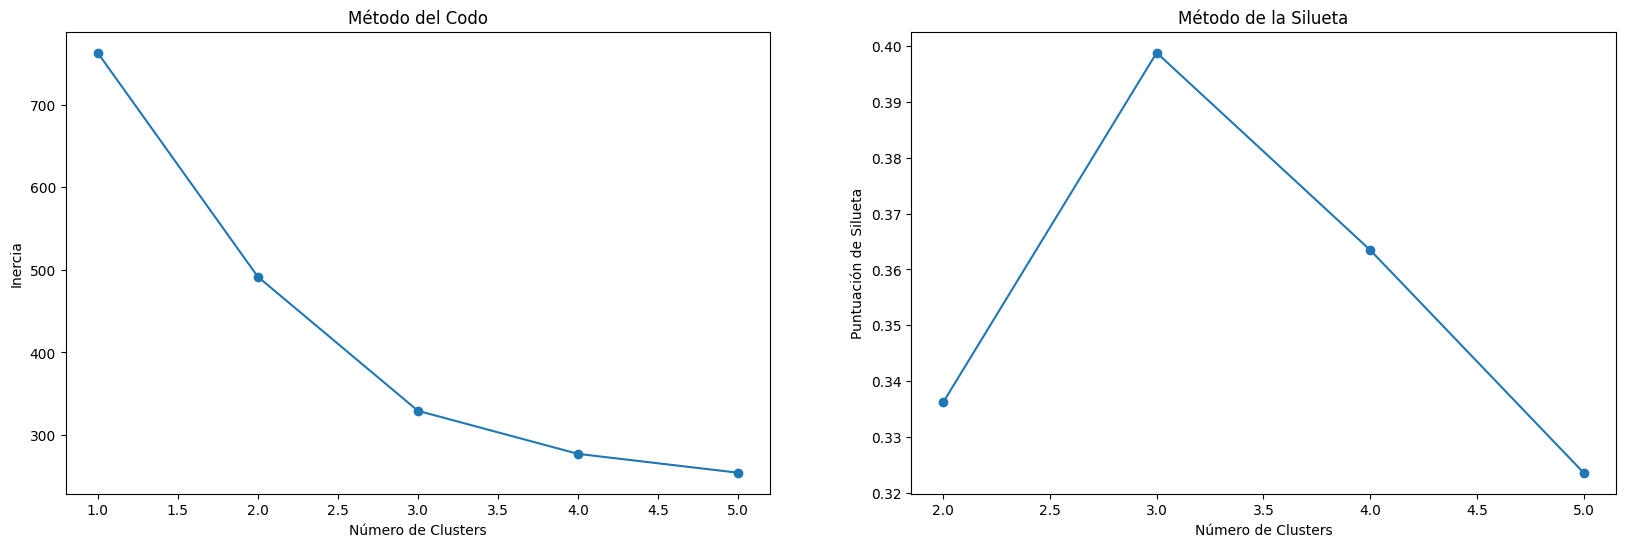

In [21]:
bt.encontrar_n_clusters(df, max_clusters=5)

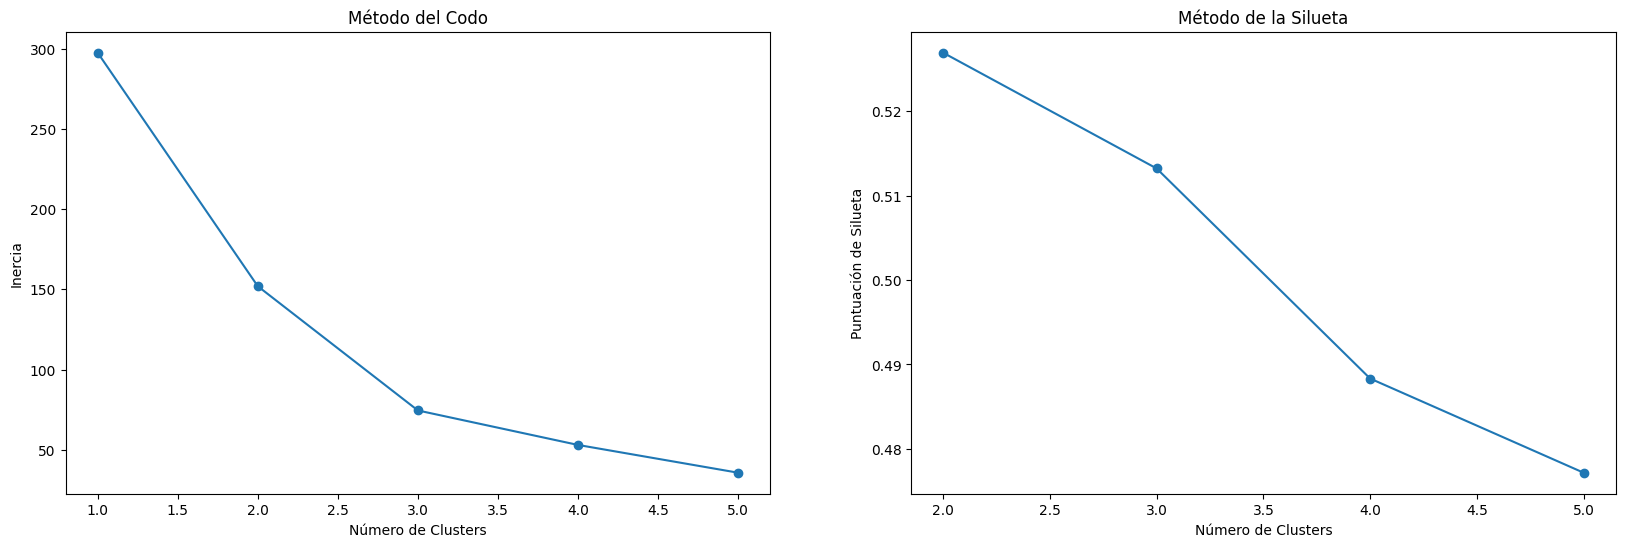

In [57]:
bt.encontrar_n_clusters(df[train_set], max_clusters=5)

In [102]:
#calculo mejor eps DF
bt.best_eps(df, max_eps=1000, min_eps=1, paso_eps=1)

(2, 0.42965250818731454)

In [55]:
#calculo mejor eps TRAIN SET
bt.best_eps(df[train_set], max_eps=1000, min_eps=1, paso_eps=1)

(1, 0.4162476801730759)

In [51]:
afp=AffinityPropagation(preference=-50)
afp.fit(df)
labels=afp.labels_
print(f"n_cluster:{len(afp.cluster_centers_indices_)}")


n_cluster:4


In [54]:
afp=AffinityPropagation(preference=-50)
afp.fit(df[train_set])
labels=afp.labels_
print(f"n_cluster:{len(afp.cluster_centers_indices_)}")

n_cluster:3


In [94]:
dbscan = DBSCAN(eps=2,
                min_samples=3)
dbscan.fit(df)

DBSCAN(eps=2, min_samples=3)

In [95]:
# Todos los datos etiquetados
print(len(dbscan.labels_))

# Los 10 primeros labels
print(dbscan.labels_[:10])

# core
print(dbscan.core_sample_indices_)

# Cuantos clusters ha montado
print(np.unique(dbscan.labels_))

153
[0 0 0 0 0 0 0 0 0 0]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152]
[-1  0]


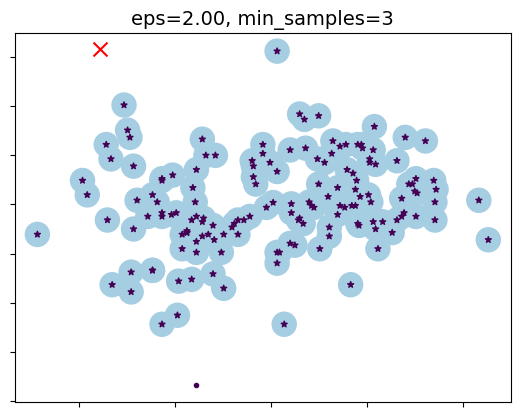

In [96]:
bt.plot_dbscan(dbscan, df, size=300, show_xlabels=False, show_ylabels=False)

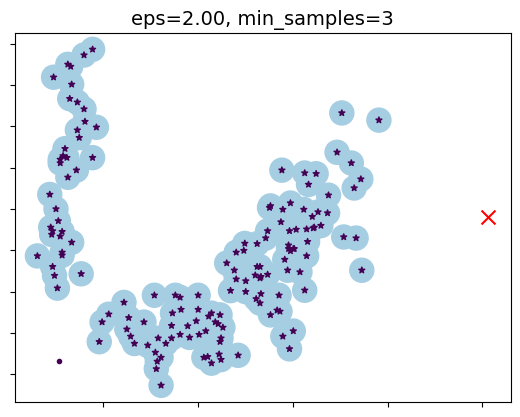

In [97]:
# ME QUEDO CON EL RESULTADO DE LAS DOS COLUMNAS CAFEINA Y TAURINA
bt.plot_dbscan(dbscan, df[train_set], size=300, show_xlabels=False, show_ylabels=False)

In [63]:
df[train_set].head(1)

,Cafeína,Taurina
0,1.034819,0.251717


In [64]:
df.head(1)

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717


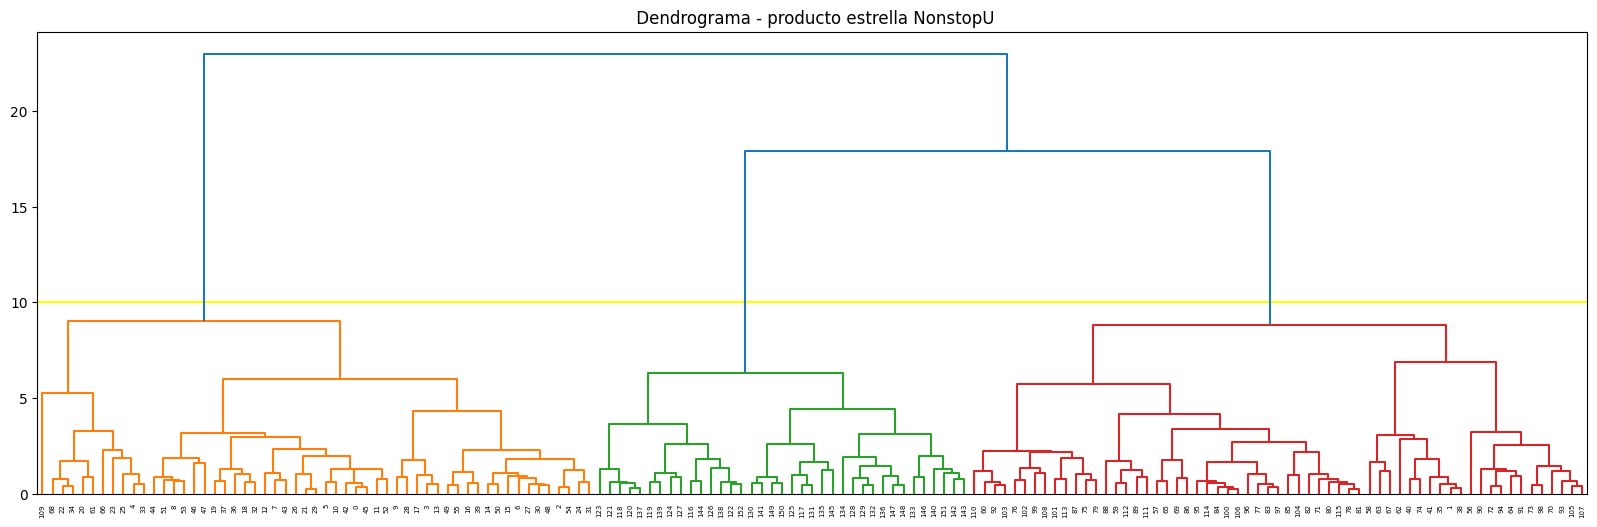

In [100]:
# probamos con el modelo de clustering jerarquico con el metodo botton up o de aglomeracion

# El mini Eda ya esta hecho asi que vamos con el dendrograma

# empecemos pintando el dendrograma con la K que hemos conseguido con el metodo DVSCAN , es decir , 3

plt.figure(figsize=(20, 6))
plt.title(" Dendrograma - producto estrella NonstopU")
plt.axhline(y = 10, color = 'yellow', linestyle = '-')

selected_data = df
clusters = shc.linkage(selected_data, 
            method='ward', # Este hiperparámetro y el siguiente tienen que ver con la distancia entre clústeres y los veremos un poco más adelante
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

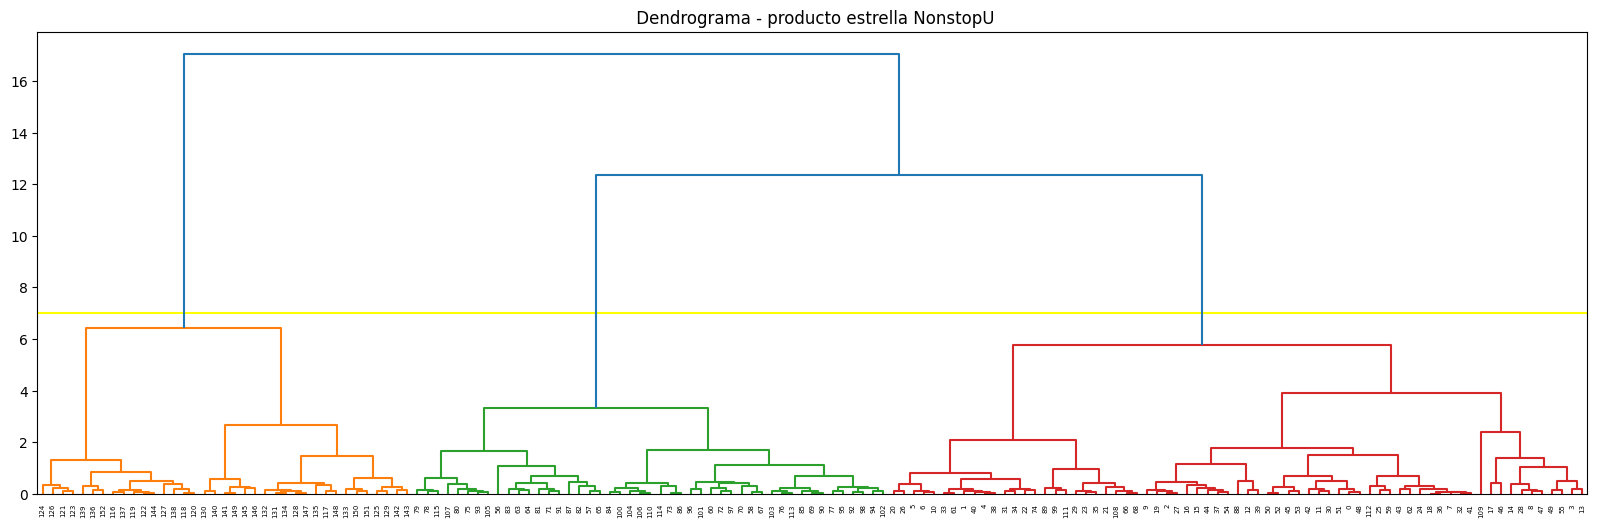

In [101]:
plt.figure(figsize=(20, 6))
plt.title(" Dendrograma - producto estrella NonstopU")
plt.axhline(y = 7, color = 'yellow', linestyle = '-')

selected_data = df[train_set]
clusters = shc.linkage(selected_data, 
            method='ward', # Este hiperparámetro y el siguiente tienen que ver con la distancia entre clústeres y los veremos un poco más adelante
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

HCA

In [85]:
# ahora que tenemos como referencia el dendrogrma y hemos escogidos nuestros iniales valares de k e hiperparametros podemos aplicar el modelo HCA- aglometarivo

hca = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hca.fit(df)
#hca.labels_

AgglomerativeClustering(n_clusters=3)

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, style, size. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


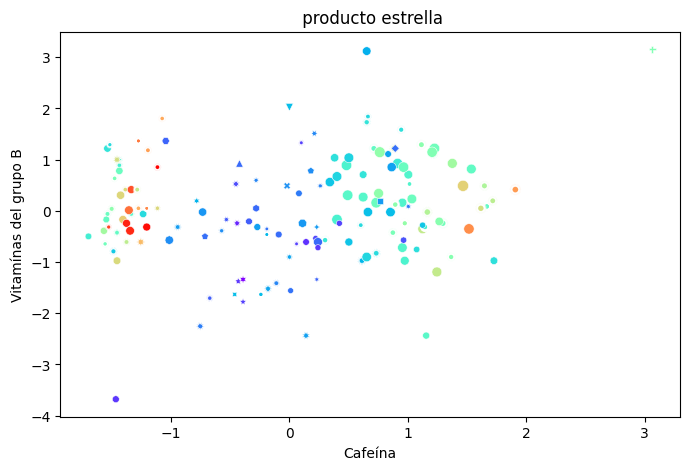

In [70]:
# pintamos un sacater con el resultado de las labels(LO DEJAMOS)
fig = plt.figure(figsize=(8,5))
sns.scatterplot(df["Cafeína"], 
                df['Vitamínas del grupo B'], 
                df['Taurina'],
                df['Azúcares'],
                df['Ácido Cítrico'],
                legend=False,
                data=df, 
                hue=hca.labels_, palette = "rainbow").set_title(' producto estrella')

plt.show()

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' producto estrella_train_set')

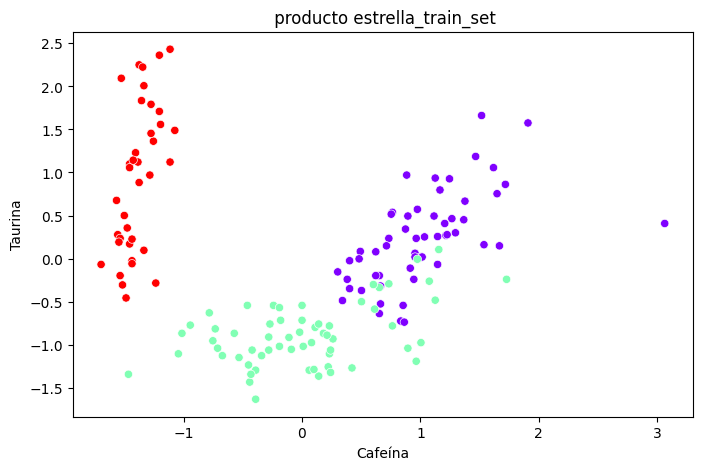

In [86]:
# pintamos un sacater con el resultado de las labels (MEJOR CONCENTRACION DE GRUPOS)
fig = plt.figure(figsize=(8,5))
sns.scatterplot(df["Cafeína"], 
                df['Taurina'],
                legend=False,
                data=df, 
                hue=hca.labels_, palette = "rainbow").set_title(' producto estrella_train_set')

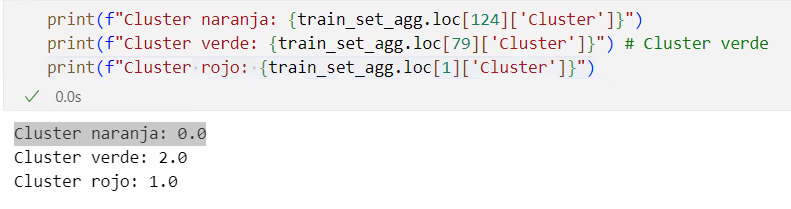

### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [34]:
df_new_exp= pd.read_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRINT_15_NO_SUPERVISADOS_CLUSTERING\UNIT_2\TRABAJO_OBL\data\new_experiments.csv", sep="|")

In [35]:
df_new_exp

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043


In [36]:
bt.obtener_estadisticas(df_new_exp)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
Azúcares,100.0,float64,0.03,No,1.21,1.45,-0.77,0.17,0.88,numerica discreta,0.0
Vitamínas del grupo B,100.0,float64,0.09,No,0.83,0.68,-0.11,0.32,0.56,numerica discreta,0.0
Cafeína,100.0,float64,-0.35,No,1.14,1.3,-1.21,-0.56,0.35,numerica discreta,0.0
Ácido Cítrico,100.0,float64,0.11,No,1.16,1.34,-0.37,-0.15,0.21,numerica discreta,0.0
Taurina,100.0,float64,-0.03,No,1.14,1.31,-0.7,-0.59,0.42,numerica discreta,0.0


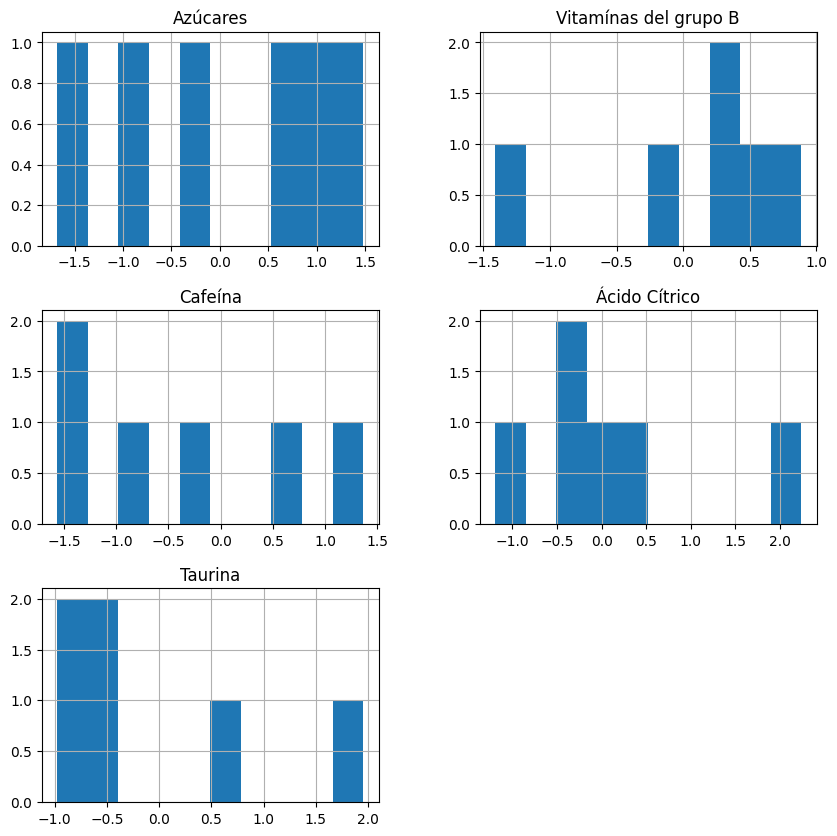

In [37]:
df_new_exp.hist(figsize=(10,10), bins=10);

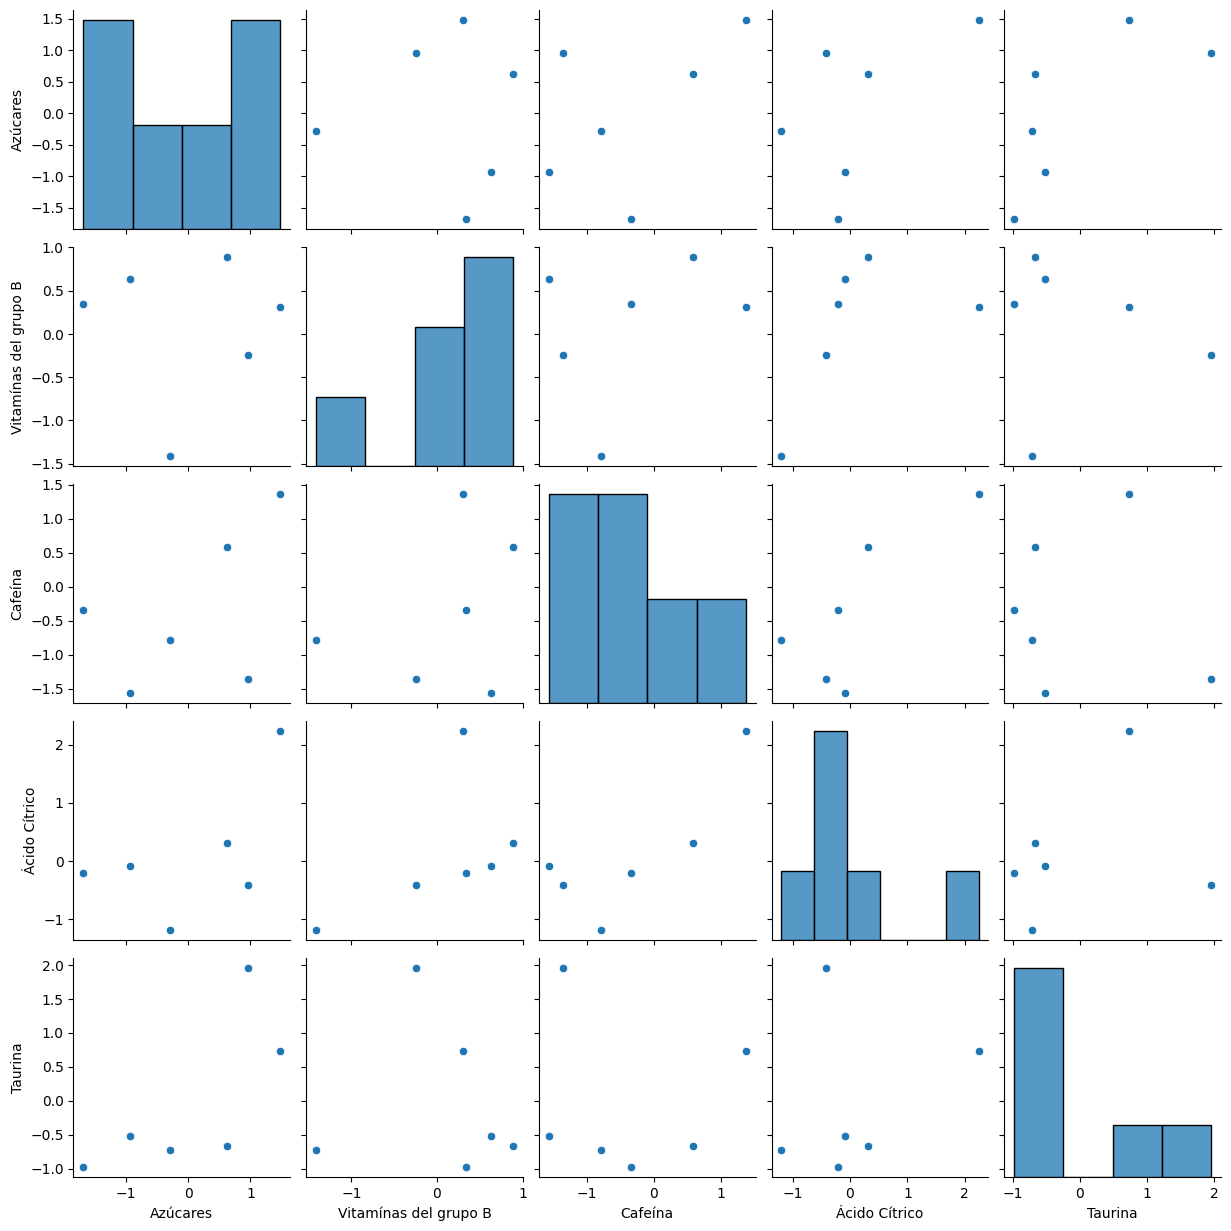

In [38]:
sns.pairplot(df_new_exp)

In [39]:
len(dbscan.labels_)

153

In [40]:
len(dbscan.components_)

151

In [41]:
# cogemos 3 modelos diferentes
knn_model = KNeighborsClassifier(n_neighbors=100)
lgbm_model = LGBMClassifier(verbose=-100)

# Utilizar los componentes como características y las etiquetas como objetivo
X_train = dbscan.components_
y_train = dbscan.labels_[:-2]

## entrenamos con un modelo clasificatorio supervisado con los valores de dbscan para hacer las prerdicciones
knn_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Hacer predicciones en los nuevos datos
knn_pred = knn_model.predict(df_new_exp)
lgbm_pred = lgbm_model.predict(df_new_exp)


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


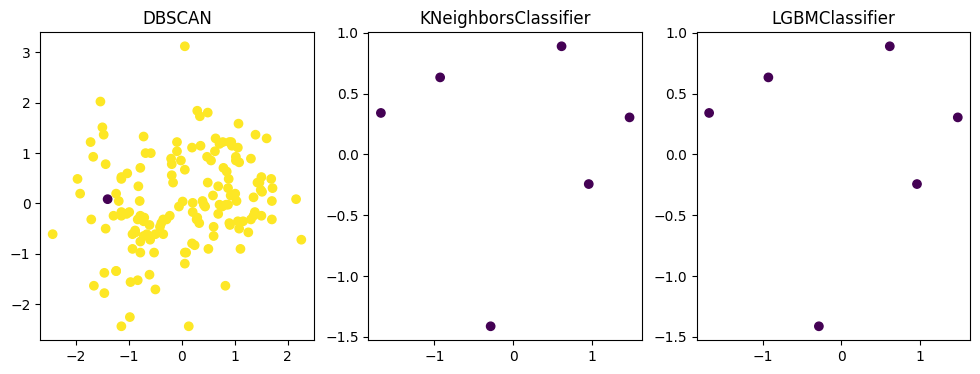

In [42]:
# Visualizar los resultados
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(dbscan.components_[:, 0], dbscan.components_[:, 1], c=dbscan.labels_[:-2], cmap='viridis')
plt.title('DBSCAN')

plt.subplot(132)
plt.scatter(df_new_exp.iloc[:, 0], df_new_exp.iloc[:, 1], c=knn_pred, cmap='viridis')
plt.title('KNeighborsClassifier')

plt.subplot(133)
plt.scatter(df_new_exp.iloc[:, 0], df_new_exp.iloc[:, 1], c=lgbm_pred, cmap='viridis')
plt.title('LGBMClassifier')

plt.show()

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.